# Componente angular de la función de onda para los orbitales híbridos sp, sp<sup>2</sup> y sp<sup>3</sup>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Componente angular de la función de onda para orbitales s y p

La componente angular de la función de onda del orbital **s** y de los tres orbitales **p** está dada por:

$\displaystyle Y_s = \sqrt{\frac{1}{4 \pi}}$

$\displaystyle Y_{p_z} = \sqrt{\frac{3}{4 \pi}} \cos\left(\theta\right)$

$\displaystyle Y_{p_x} = \sqrt{\frac{3}{4 \pi}} \sin\left(\theta\right)\cos\left(\phi\right)$

$\displaystyle Y_{p_y} = \sqrt{\frac{3}{4 \pi}} \sin\left(\theta\right)\sin\left(\phi\right)$


In [2]:
c_s = 1/np.sqrt(4*np.pi)
c_p = np.sqrt(3/(4*np.pi))

# Componente angular de orbital s
def Y_s(theta, phi):
    return 0*theta + c_s

# Componente angular de orbital p_z
def Y_pz(theta, phi):
    return c_p * np.cos(theta)

# Componente angular de orbital p_x
def Y_px(theta, phi):
    return c_p * np.sin(theta) * np.cos(phi)

# Componente angular de orbital p_y
def Y_py(theta, phi):
    return c_p * np.sin(theta) * np.sin(phi)

## 2. Orbitales híbridos

In [3]:
# Grafica polar
def polar_subplot(theta, rs=[], subplot=111, set_rmax=0.65, title="Y", color="tab:blue", linewidth=3):
    ax_ = plt.subplot(subplot, projection='polar')
    for r_ in rs:
        ax_.plot(theta.flatten(), r_.flatten(), linewidth=linewidth, color=color)
    ax_.set_rmax(set_rmax)
    ax_.set_rticks([])
    ax_.set_title(title, y=1.1)
    ax_.grid(True)
    ax_.set_theta_zero_location("N")
    return ax_

# Grafica cartesiana
def cartesian_subplot(thetaG, rs=[], subplot=111, title="Y", color="tab:blue", linewidth=3):
    ax_ = plt.subplot(subplot)
    for r_ in rs:
        x = r_ * np.cos(thetaG)
        y = r_ * np.sin(thetaG)
        ax_.plot(x.flatten(), y.flatten(), linewidth=linewidth, color=color)
    #ax_.set_xlabel('x')
    #ax_.set_ylabel('y')
    ax_.set_title(title, y=1.03)
    ax_.grid()
    return ax_

La componente angular de la función de onda de los orbitales híbridos **sp**, **sp<sup>2</sup>**, **sp<sup>3</sup>** está dada por las siguientes expresiones.


### 2.1 Orbitales sp


$\displaystyle Y_{sp_1} = \sqrt{\frac{1}{2}} \left( Y_s + Y_{p_z}\right)$

$\displaystyle Y_{sp_2} = \sqrt{\frac{1}{2}} \left( Y_s - Y_{p_z}\right)$

In [7]:
c_s12 = np.sqrt(0.5)

# Componente angular de orbital híbrido sp_1
def Y_sp_1(theta, phi):
    return c_s12 * (Y_s(theta, phi) + Y_pz(theta, phi))

# Componente angular de orbital híbrido sp_2
def Y_sp_2(theta, phi):
    return c_s12 * (Y_s(theta, phi) - Y_pz(theta, phi))

In [8]:
pylab.rcParams['figure.figsize'] = (15.0, 4.7)

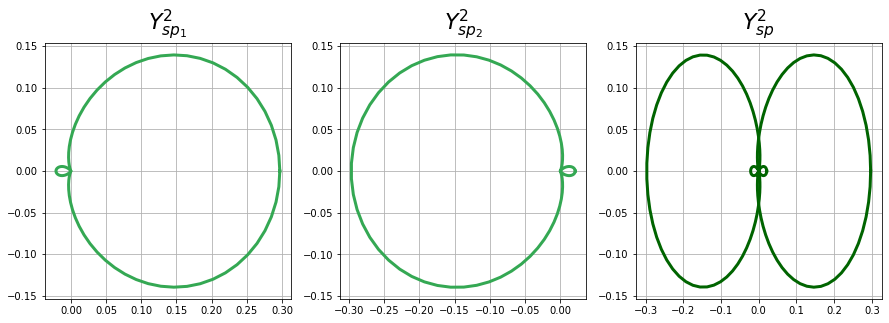

In [9]:
theta = np.linspace(0, 2*np.pi, 100)
phi = 0
thetaG, phiG = np.meshgrid(theta, phi)
r2_1 = Y_sp_1(thetaG, phiG)**2
r2_2 = Y_sp_2(thetaG, phiG)**2

# plots
ax1 = cartesian_subplot(thetaG, rs=[r2_1], subplot=131, title="$Y^2_{sp_1}$", color="#34A853")
ax2 = cartesian_subplot(thetaG, rs=[r2_2], subplot=132, title="$Y^2_{sp_2}$", color="#34A853")
ax2 = cartesian_subplot(thetaG, rs=[r2_1, r2_2], subplot=133, title="$Y^2_{sp}$", color="darkgreen")

base_fsize = 18
plt.rc('axes', titlesize=base_fsize+4)
plt.show()

### 2.2 Orbitales sp<sup>2</sup>

$\displaystyle Y_{sp2_1} = \sqrt{\frac{1}{3}} Y_s + \sqrt{\frac{2}{3}} Y_{p_x}$

$\displaystyle Y_{sp2_2} = \sqrt{\frac{1}{3}} Y_s - \sqrt{\frac{1}{6}} Y_{p_x} + \sqrt{\frac{1}{2}} Y_{p_y}$

$\displaystyle Y_{sp2_3} = \sqrt{\frac{1}{3}} Y_s - \sqrt{\frac{1}{6}} Y_{p_x} - \sqrt{\frac{1}{2}} Y_{p_y}$

In [4]:
c_s13 = np.sqrt(1/3)
c_s23 = np.sqrt(2/3)
c_s16 = np.sqrt(1/6)
c_s12 = np.sqrt(0.5)

# Componente angular de orbital híbrido sp2_1
def Y_sp2_1(theta, phi):
    return c_s13 * Y_s(theta, phi) + c_s23 * Y_px(theta, phi)

# Componente angular de orbital híbrido sp2_2
def Y_sp2_2(theta, phi):
    return c_s13 * Y_s(theta, phi) - c_s16 * Y_px(theta, phi) + c_s12 * Y_py(theta, phi)

# Componente angular de orbital híbrido sp2_3
def Y_sp2_3(theta, phi):
    return c_s13 * Y_s(theta, phi) - c_s16 * Y_px(theta, phi) - c_s12 * Y_py(theta, phi)

In [8]:
pylab.rcParams['figure.figsize'] = (10.0, 10.8)

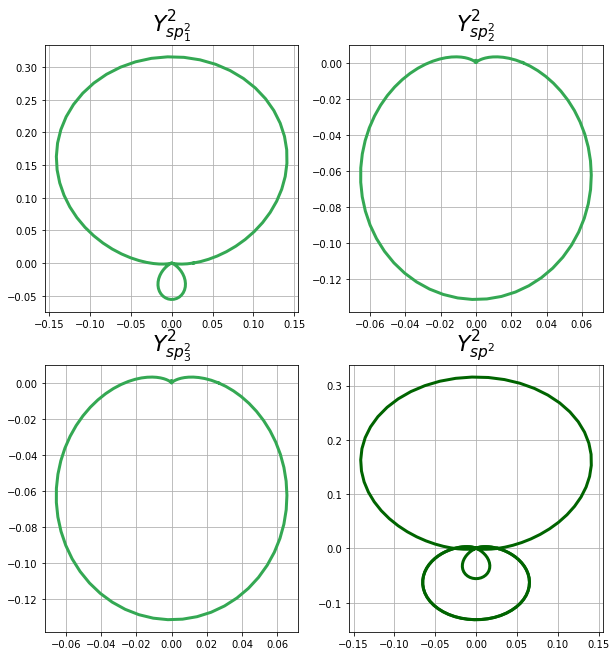

In [9]:
theta = np.linspace(0, 2*np.pi, 100)
phi = 0
thetaG, phiG = np.meshgrid(theta, phi)
r2_1 = Y_sp2_1(thetaG, phiG)**2
r2_2 = Y_sp2_2(thetaG, phiG)**2
r2_3 = Y_sp2_3(thetaG, phiG)**2

# plots
ax1 = cartesian_subplot(thetaG, rs=[r2_1], subplot=221, title="$Y^2_{sp^2_1}$", color="#34A853")
ax2 = cartesian_subplot(thetaG, rs=[r2_2], subplot=222, title="$Y^2_{sp^2_2}$", color="#34A853")
ax3 = cartesian_subplot(thetaG, rs=[r2_3], subplot=223, title="$Y^2_{sp^2_3}$", color="#34A853")
ax4 = cartesian_subplot(thetaG, rs=[r2_1, r2_2, r2_3], subplot=224, title="$Y^2_{sp^2}$", color="darkgreen")

base_fsize = 18
plt.rc('axes', titlesize=base_fsize+4)
plt.show()

### 2.2 Orbitales sp<sup>3</sup>

$\displaystyle Y_{sp3_1} = \frac{1}{2} Y_s + \frac{1}{2} Y_{p_x} + \frac{1}{2} Y_{p_y} + \frac{1}{2} Y_{p_z}$

$\displaystyle Y_{sp3_2} = \frac{1}{2} Y_s - \frac{1}{2} Y_{p_x} - \frac{1}{2} Y_{p_y} + \frac{1}{2} Y_{p_z}$

$\displaystyle Y_{sp3_3} = \frac{1}{2} Y_s + \frac{1}{2} Y_{p_x} - \frac{1}{2} Y_{p_y} - \frac{1}{2} Y_{p_z}$

$\displaystyle Y_{sp3_4} = \frac{1}{2} Y_s - \frac{1}{2} Y_{p_x} + \frac{1}{2} Y_{p_y} - \frac{1}{2} Y_{p_z}$

In [5]:
c_12 = 0.5

# Componente angular de orbital híbrido sp3_1
def Y_sp3_1(theta, phi):
    return c_12*Y_s(theta, phi) + c_12*Y_px(theta, phi) + c_12*Y_py(theta, phi) + c_12*Y_pz(theta, phi)

# Componente angular de orbital híbrido sp3_2
def Y_sp3_2(theta, phi):
    return c_12*Y_s(theta, phi) - c_12*Y_px(theta, phi) - c_12*Y_py(theta, phi) + c_12*Y_pz(theta, phi)

# Componente angular de orbital híbrido sp3_3
def Y_sp3_3(theta, phi):
    return c_12*Y_s(theta, phi) + c_12*Y_px(theta, phi) - c_12*Y_py(theta, phi) - c_12*Y_pz(theta, phi)

# Componente angular de orbital híbrido sp3_4
def Y_sp3_4(theta, phi):
    return c_12*Y_s(theta, phi) - c_12*Y_px(theta, phi) + c_12*Y_py(theta, phi) - c_12*Y_pz(theta, phi)

In [11]:
pylab.rcParams['figure.figsize'] = (15.0, 10.8)

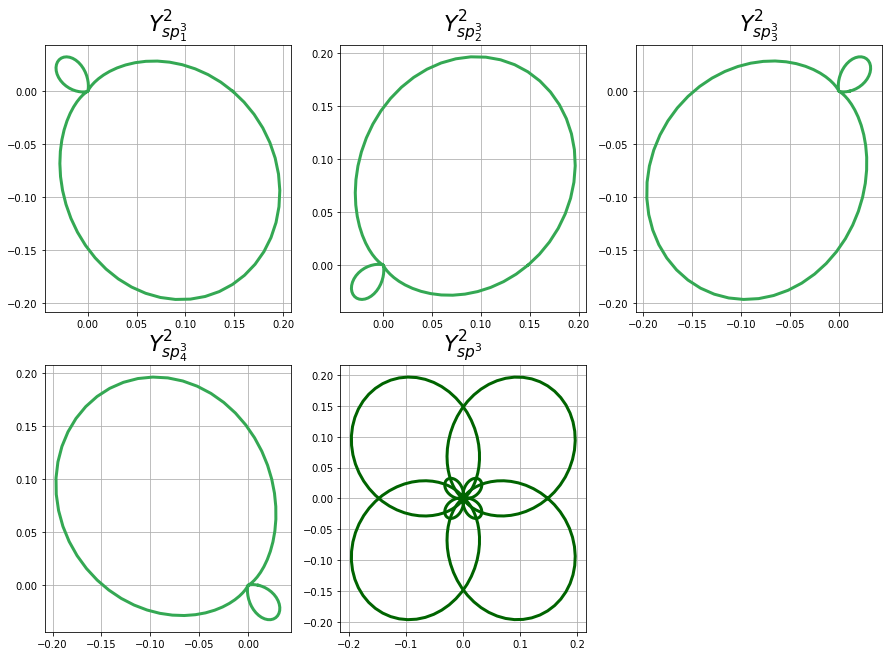

In [12]:
theta = np.linspace(0, 2*np.pi, 100)
phi = np.pi
thetaG, phiG = np.meshgrid(theta, phi)
r2_1 = Y_sp3_1(thetaG, phiG)**2
r2_2 = Y_sp3_2(thetaG, phiG)**2
r2_3 = Y_sp3_3(thetaG, phiG)**2
r2_4 = Y_sp3_4(thetaG, phiG)**2

# plots
ax1 = cartesian_subplot(thetaG, rs=[r2_1], subplot=231, title="$Y^2_{sp^3_1}$", color="#34A853")
ax2 = cartesian_subplot(thetaG, rs=[r2_2], subplot=232, title="$Y^2_{sp^3_2}$", color="#34A853")
ax3 = cartesian_subplot(thetaG, rs=[r2_3], subplot=233, title="$Y^2_{sp^3_3}$", color="#34A853")
ax4 = cartesian_subplot(thetaG, rs=[r2_4], subplot=234, title="$Y^2_{sp^3_4}$", color="#34A853")
ax5 = cartesian_subplot(thetaG, rs=[r2_1, r2_2, r2_3, r2_4], subplot=235, title="$Y^2_{sp^3}$", color="darkgreen")

base_fsize = 18
plt.rc('axes', titlesize=base_fsize+4)
plt.show()

## 3. Gráficas 3D

In [ ]:
# Restart kernel

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline  
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [9]:
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

### 3.1 Orbital sp

In [10]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 2*100)
thetaG, phiG = np.meshgrid(theta, phi)
r2 = Y_sp_1(thetaG, phiG)**2

# cartesian coords
x = r2 * np.sin(thetaG) * np.cos(phiG)
y = r2 * np.sin(thetaG) * np.sin(phiG)
z = r2 * np.cos(thetaG)

<IPython.core.display.Javascript object>


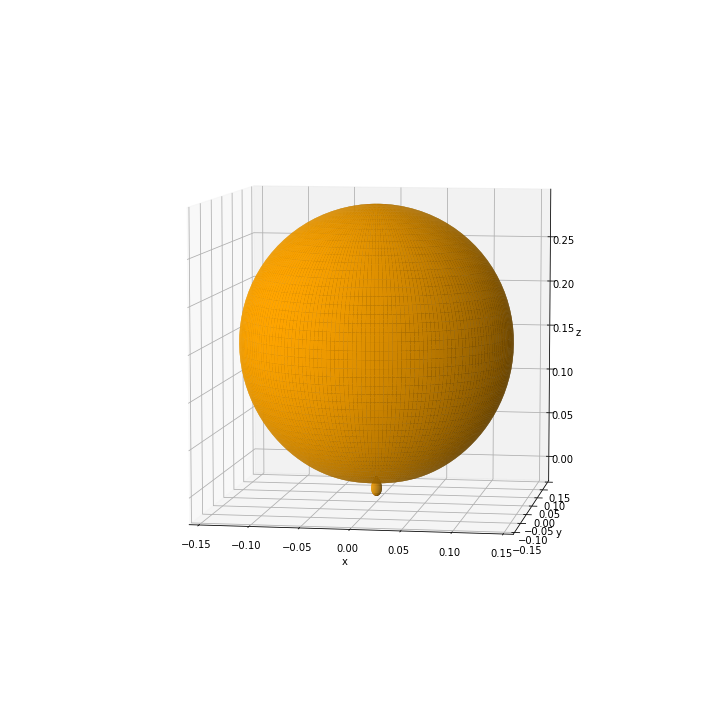

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, color='orange', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### 3.2 Orbital sp<sup>2</sup>

In [12]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 2*100)
thetaG, phiG = np.meshgrid(theta, phi)
r2 = Y_sp2_1(thetaG, phiG)**2

# cartesian coords
x = r2 * np.sin(thetaG) * np.cos(phiG)
y = r2 * np.sin(thetaG) * np.sin(phiG)
z = r2 * np.cos(thetaG)

<IPython.core.display.Javascript object>


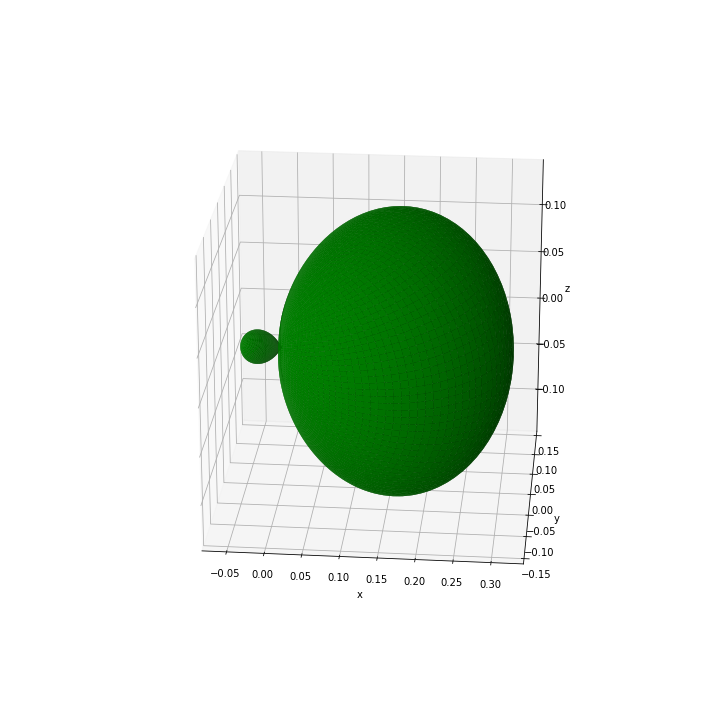

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, color='green', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### 3.3 Orbital sp<sup>3</sup>

In [14]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 2*100)
thetaG, phiG = np.meshgrid(theta, phi)
r2 = Y_sp3_1(thetaG, phiG)**2

# cartesian coords
x = r2 * np.sin(thetaG) * np.cos(phiG)
y = r2 * np.sin(thetaG) * np.sin(phiG)
z = r2 * np.cos(thetaG)

<IPython.core.display.Javascript object>


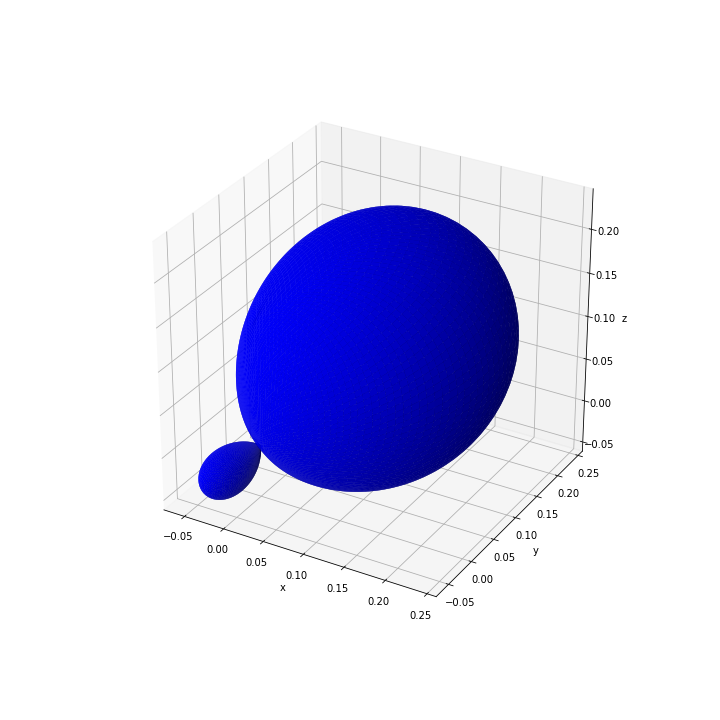

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, color='blue', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()